In [1]:
WORKSPACEFOLDER = 'D:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [2]:
import json

import torch

import config

In [3]:
DB = config.get_DB()

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
import src.main.util.nn.sample as sample
import src.main.util.nn.training as training
import src.main.model.nn.custom_module as custom_module

In [7]:
import src.main.util.data_format as data_format

In [8]:
g_name, mean = 'DiSF_b', 20  # 0.972

In [9]:
conf = training.Conf()
conf.model = custom_module.OrderIndependentNet
conf.loss_fn = torch.nn.NLLLoss()
conf.early_stop_epoch = 40

In [10]:
num_samples = 40000

In [12]:
beta = 0.0200

In [13]:
base_path = os.path.join(DB, g_name)
node_path = os.path.join(base_path, f'nodes_degree_approx_{mean}.json')
emb_path = os.path.join(base_path, 'node2vec.emb.json')
p_gin_path = os.path.join(base_path, f'gin_mat\\n{beta:.4f}.json')

nodes = data_format.load_json(node_path)
node_emb = data_format.load_json(emb_path)
p_gins = data_format.load_json(p_gin_path)

<IPython.core.display.Javascript object>


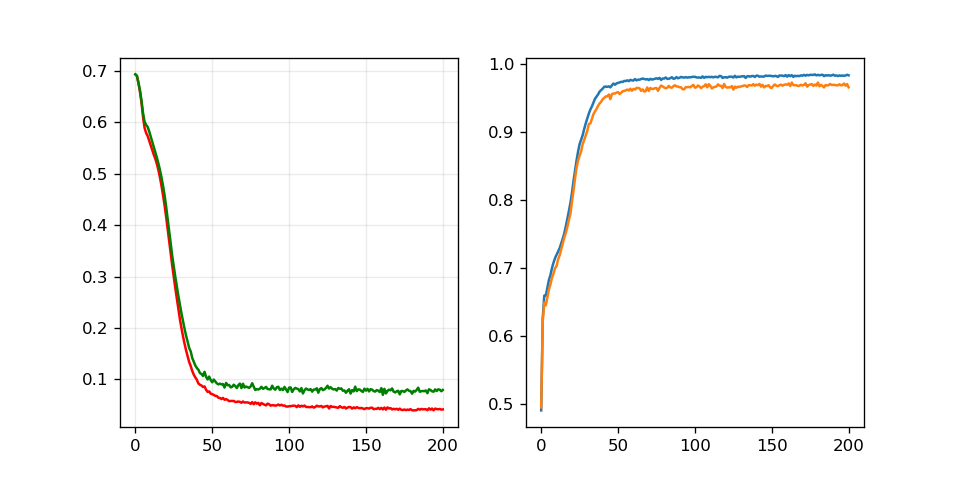

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

In [18]:
samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, 40000)
ret = training.classify(samples, 2, conf, ax[0])

training hit rate -->  0.98278125,          validation hit rate -->  0.96512500


In [19]:
ax[1].plot(ret[3])

In [20]:
ax[1].plot(ret[4])

In [21]:
len(ret[1])

201

In [23]:
data = {
    'g_name': 'DiSF_b',
    'mean': 20,
    'beta': 0.0200,
    'epochs': list(range(201)),
    'Training Loss': ret[1],
    'Validation Loss': ret[2],
    'Training Accuracy': ret[3],
    'Validation Accuracy': ret[4],
}
data_format.save_json(r'db\DiSF_b\img\training_nn.json', data)

In [20]:
samples_test = sample.get_samples_order_independent_net(nodes, node_emb, p_gins)

In [23]:
test_guess = model[0](samples_test[:, :-1])

training.hit_rate(test_guess, samples_test[:, -1])

0.9676

## Condition: cn20 beta0.0100

## Condition: cn20 beta0.0300

## Condition: cn20 beta0.0500